# Creating Machine Learning Models

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import scale

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import completeness_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

import skimage
from skimage.data import coins
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.image import grid_to_graph

In [316]:
!pip install scikit-image

## Regression Models

### Boston Housing Dataset

* crim - per capita crime rate by town.
* zn - proportion of residential land zoned for lots over 25,000 sq.ft.
* indus - proportion of non-retail business acres per town.
* chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* nox - nitrogen oxides concentration (parts per 10 million).
* rm - average number of rooms per dwelling.
* age - proportion of owner-occupied units built prior to 1940.
* dis - weighted mean of distances to five Boston employment centres.
* rad - index of accessibility to radial highways.
* tax - full-value property-tax rate per \$10,000.
* ptratio - pupil-teacher ratio by town.
* lstat - lower status of the population (percent).
* medv - median value of owner-occupied homes in \$1000s.

In [4]:
data = pd.read_csv("boston_data.csv")
data.head(2)

,ID,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,1,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   indus    333 non-null    float64
 2   chas     333 non-null    int64  
 3   nox      333 non-null    float64
 4   rm       333 non-null    float64
 5   age      333 non-null    float64
 6   dis      333 non-null    float64
 7   rad      333 non-null    int64  
 8   tax      333 non-null    int64  
 9   ptratio  333 non-null    float64
 10  lstat    333 non-null    float64
 11  medv     333 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 31.3 KB


In [5]:
data.describe()

,ID,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,12.515435,22.768769
std,147.859438,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,7.067781,9.173468
min,1.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,1.730000,5.000000
25%,123.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,7.180000,17.400000
50%,244.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,10.970000,21.600000
75%,377.000000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,16.420000,25.000000
max,506.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,37.970000,50.000000


#### Data cleaning and preparation

In [8]:
data.isnull().sum().sum()

0

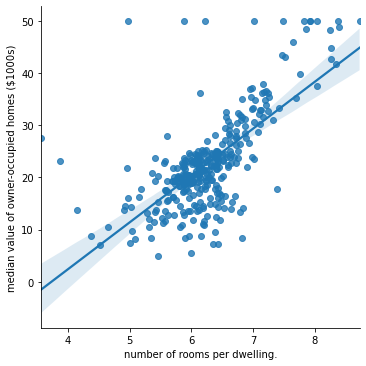

In [14]:
# Compare the rooms per dwelling and the median value - plot values and a linear regression line
sns.lmplot('rm', 'medv', data)
plt.xlabel("number of rooms per dwelling.")
plt.ylabel("median value of owner-occupied homes ($1000s)")
plt.show()

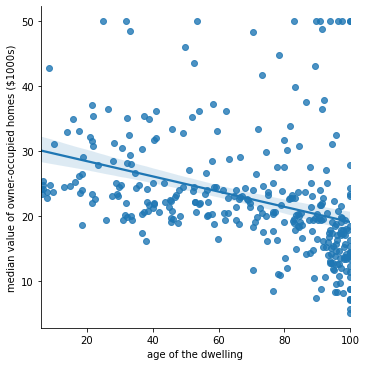

In [15]:
# Age and median value of dwelling
sns.lmplot('age', 'medv', data)
plt.xlabel("age of the dwelling")
plt.ylabel("median value of owner-occupied homes ($1000s)")
plt.show()

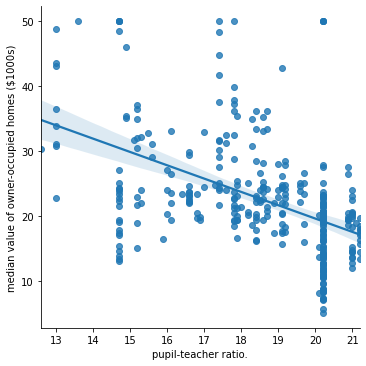

In [16]:
# Pupil teacher ratio against the median value of dwelling
sns.lmplot('ptratio', 'medv', data)
plt.xlabel("pupil-teacher ratio.")
plt.ylabel("median value of owner-occupied homes ($1000s)")
plt.show()

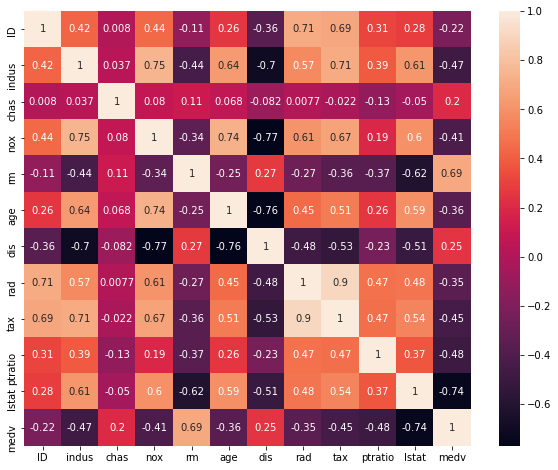

In [17]:
correlation = data.corr()
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.show()

#### Linear Regression

In [19]:
X = data.drop('medv', axis=1)
Y = data['medv']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [21]:
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
y_pred = linear_regression.predict(x_test)

In [22]:
df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
df_y.sample(10)

,y_test,y_pred
64,25.0,29.587203
101,15.4,13.269913
22,30.8,30.046916
74,19.4,19.845406
175,43.1,34.636335
311,13.8,16.675553
145,24.4,25.412682
218,19.3,22.038884
68,26.5,26.674851
65,20.6,26.624814


In [23]:
print("Training score : ", linear_regression.score(x_train, y_train))

Training score :  0.7191154693675492


In [26]:
score = r2_score(y_test, y_pred)
print("Testing score : ", score)

Testing score :  0.6917086895657429


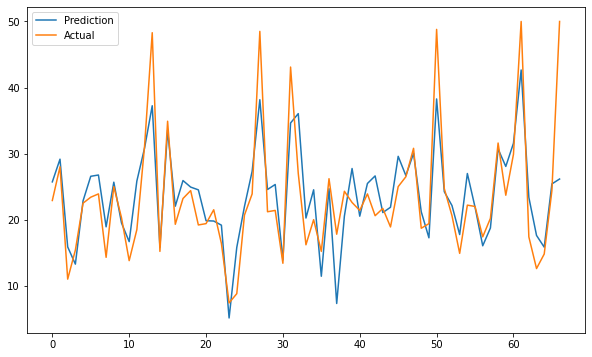

In [29]:
plt.subplots(figsize=(10,6))
plt.plot(y_pred, label="Prediction")
plt.plot(y_test.values, label="Actual")
plt.legend()
plt.show()

#### Ordinary Least Squares Using StatsModels

In [32]:
# Need to get X as an array and add a constant for the intercept
X = np.array(X)
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     73.85
Date:                Mon, 06 Sep 2021   Prob (F-statistic):           4.58e-81
Time:                        16:52:23   Log-Likelihood:                -1000.0
No. Observations:                 333   AIC:                             2024.
Df Residuals:                     321   BIC:                             2070.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.2408      6.149      6.544      0.000      28.144      52.338
x1            -0.0037      0.003     -1.368      0.172      -0.009       0.002
x2             0.0298      0.076      0.394      0.694      -0.119       0.178
x3             4.1573      1.177      3.534      0.000       1.843       6.472
x4           -17.1698      4.957     -3.464      0.001     -26.923      -7.417
x5             3.9450      0.529      7.455      0.000       2.904       4.986
x6            -0.0103      0.017     -0.587      0.557      -0.045       0.024
x7            -1.3018      0.255     -5.114      0.000      -1.803      -0.801
x8             0.2847      0.082      3.491      0.001       0.124       0.445
x9            -0.0093      0.005     -2.016      0.045      -0.018      -0.000
x10           -0.9592      0.162     -5.927      0.000      -1.278      -0.641
x11           -0.6378      0.063    -10.186      0.000      -0.761      -0.515
==============================================================================
Omnibus:                      118.665   Durbin-Watson:                   1.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              440.066
Skew:                           1.535   Prob(JB):                     2.76e-96
Kurtosis:                       7.722   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Diamonds Dataset - Regression using Categorical Data

* price price in US dollars (\$326--\$18,823)
* carat weight of the diamond (0.2--5.01)
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color diamond colour, from J (worst) to D (best)
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x length in mm (0--10.74)
* y width in mm (0--58.9)
* z depth in mm (0--31.8)
* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table width of top of diamond relative to widest point (43--95)

In [126]:
data = pd.read_csv('diamonds.csv', index_col=0)
data.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [128]:
data = data.sample(frac=0.2)

In [129]:
data.reset_index(inplace=True, drop=True)

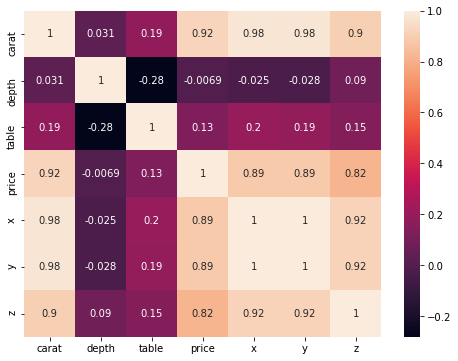

In [130]:
correlation = data.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(correlation, annot=True)
plt.show()

In [131]:
print(data['cut'].unique())
print(data['color'].unique())
print(data['clarity'].unique())

['Very Good' 'Ideal' 'Premium' 'Good' 'Fair']
['E' 'F' 'I' 'D' 'H' 'J' 'G']
['VS2' 'SI1' 'VS1' 'SI2' 'VVS1' 'I1' 'IF' 'VVS2']


In [132]:
data['cut'].value_counts()

Ideal        4353
Premium      2743
Very Good    2372
Good         1007
Fair          313
Name: cut, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='cut'>

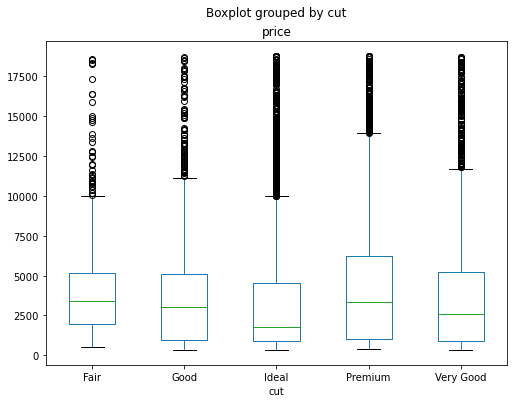

In [133]:
data.boxplot(by ='cut', column =['price'], grid = False, figsize=(8,6)) 

In [134]:
data['color'].value_counts()

G    2290
F    1948
E    1870
H    1663
D    1376
I    1065
J     576
Name: color, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='color'>

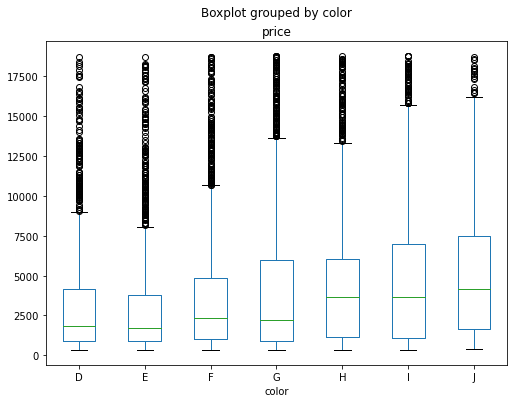

In [135]:
data.boxplot(by ='color', column =['price'], grid = False, figsize=(8,6)) 

In [136]:
data['clarity'].value_counts()

SI1     2621
VS2     2444
SI2     1832
VS1     1670
VVS2    1020
VVS1     677
IF       365
I1       159
Name: clarity, dtype: int64

<AxesSubplot:title={'center':'price'}, xlabel='clarity'>

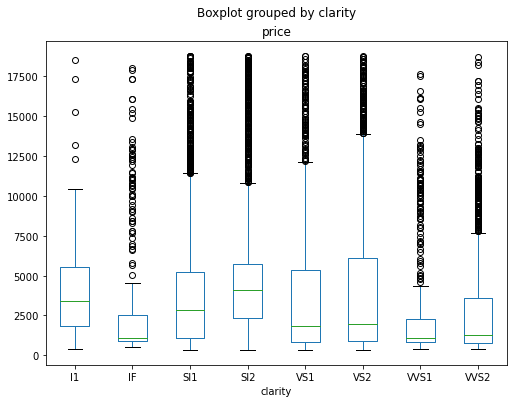

In [137]:
data.boxplot(by ='clarity', column =['price'], grid = False, figsize=(8,6)) 

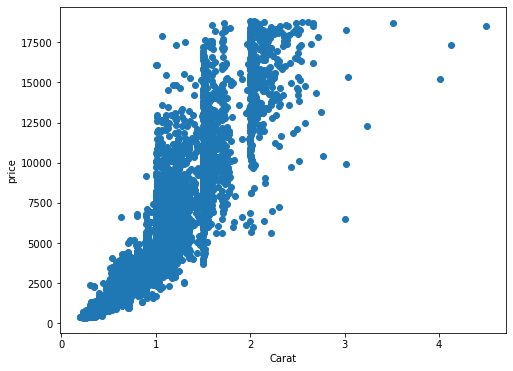

In [138]:
plt.subplots(figsize=(8,6))
plt.scatter(data['carat'], data['price'])
plt.xlabel("Carat")
plt.ylabel("price")
plt.show()

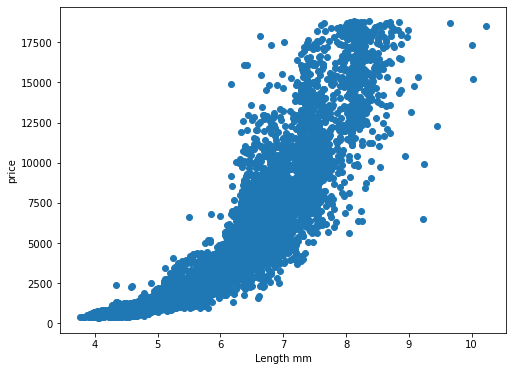

In [139]:
plt.subplots(figsize=(8,6))
plt.scatter(data['x'], data['price'])
plt.xlabel("Length mm")
plt.ylabel("price")
plt.show()

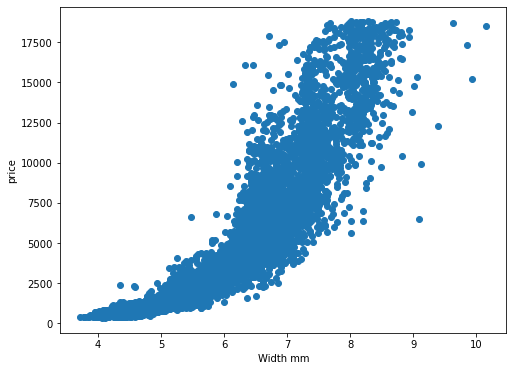

In [140]:
plt.subplots(figsize=(8,6))
plt.scatter(data['y'], data['price'])
plt.xlabel("Width mm")
plt.ylabel("price")
plt.show()

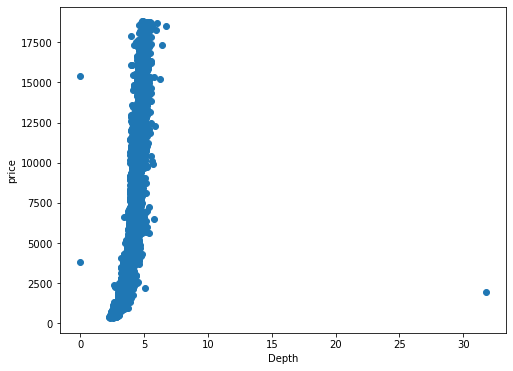

In [141]:
plt.subplots(figsize=(8,6))
plt.scatter(data['z'], data['price'])
plt.xlabel("Depth")
plt.ylabel("price")
plt.show()

#### Convert categorical to numerical values

In [142]:
clarity_dict = {"IF" : 7, "VVS1" : 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" :  2, "SI2" : 1, "I1" : 0}
data['clarity'].replace(clarity_dict, inplace=True)
data = pd.get_dummies(data, columns=['cut', 'color'])
NUMERIC_FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z']
numeric_df = data[NUMERIC_FEATURES]

In [143]:
numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.798202,61.726919,57.433537,5.732590,5.734971,3.541125
std,0.477486,1.428597,2.233006,1.121618,1.113318,0.745821
min,0.200000,43.000000,43.000000,3.770000,3.720000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.730000,2.910000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000
75%,1.040000,62.500000,59.000000,6.550000,6.540000,4.040000
max,4.500000,79.000000,76.000000,10.230000,10.160000,31.800000


In [144]:
numeric_array = scale(numeric_df)
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)
numeric_df.head(2)

,carat,depth,table,x,y,z
0,-0.917769,0.261164,0.701536,-1.054410,-1.028480,-0.940115
1,-0.813049,0.611174,-1.089854,-0.885004,-0.857811,-0.752394


In [145]:
data.head(2)

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.36,3,62.1,59.0,789,4.55,4.59,2.84,0,0,0,0,1,0,1,0,0,0,0,0
1,0.41,2,62.6,55.0,755,4.74,4.78,2.98,0,0,0,0,1,0,0,1,0,0,0,0


In [146]:
data.drop(NUMERIC_FEATURES, inplace=True, axis=1)

In [147]:
data = pd.concat([data, numeric_df], axis=1)

In [148]:
X = data.drop('price', axis=1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [149]:
linear_regression.fit(x_train, y_train)

LinearRegression()

In [150]:
y_pred = linear_regression.predict(x_test)
train_score = linear_regression.score(x_train, y_train)
print("Training score : ", train_score)
score = r2_score(y_test, y_pred)
print("Testing score : ", score)

Training score :  0.9068300534758709
Testing score :  0.9109656955462835


### Multiple Linear Regression

Bring in the preprocessed diamonds dataset

In [152]:
def linear_model(x_train, y_train):
    
    print("Linear Regression ")
    linear_regression = LinearRegression()
    
    linear_regression.fit(x_train, y_train)
    
    return linear_regression

In [153]:
def lasso_model(x_train, y_train):
    
    print("Lasso Regression")
    lasso_regression = Lasso(alpha=0.8, max_iter=10000)
    
    lasso_regression.fit(x_train, y_train)
    
    return lasso_regression

In [154]:
def ridge_model(x_train, y_train):
    
    print("Ridge Regression")
    ridge_regression = Ridge(alpha=0.9)
    
    ridge_regression.fit(x_train, y_train)
    
    return ridge_regression

In [155]:
def build_and_train_model(data, target_name, reg_fn):
    
    X = data.drop(target_name, axis=1)
    Y = data[target_name]
    
    x_train, x_test, y_train, y_test = \
        train_test_split(X, Y, test_size = 0.2, random_state=0)

    model = reg_fn(x_train, y_train)
    
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)
    
    return {'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred
           }

In [156]:
linear_reg = build_and_train_model(data, "price", linear_model)

Linear Regression 
Training Score :  0.9068300534758709
Testing Score :  0.9109656955462835


In [157]:
lasso_reg = build_and_train_model(data, "price", lasso_model)

Lasso Regression
Training Score :  0.9067198699236476
Testing Score :  0.9125343287569792


In [158]:
ridge_reg = build_and_train_model(data, "price", ridge_model)

Ridge Regression
Training Score :  0.9068220462343247
Testing Score :  0.9110272764240392


#### Stochastic Gradient Descent

In [159]:
def sgd_model(x_train, y_train):
    
    print("SGD Regression")
    sgd_regression = SGDRegressor(max_iter=2000)
    
    sgd_regression.fit(x_train, y_train)
    
    return sgd_regression

In [160]:
sgd_reg = build_and_train_model(data, "price", sgd_model)

SGD Regression
Training Score :  0.9056964529999242
Testing Score :  0.9094741643809099


## Classification Models

### Gender Voice Dataset

* meanfreq	-	mean frequency (in kHz)
* sd	        -	standard deviation of frequency
* median   	- median frequency (in kHz)
* IQR	        -	interquantile range (in kHz)
* sp.ent	    -	spectral entropy
* centroid	-	frequency centroid (see specprop)
* minfun	    -	minimum fundamental frequency measured across acoustic signal
* label	    -	Predictor class, male or female

In [163]:
data = pd.read_csv('gender_voice_dataset.csv')

In [164]:
data.head(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male


In [165]:
data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


Scaling not required

<AxesSubplot:title={'center':'meanfreq'}, xlabel='label'>

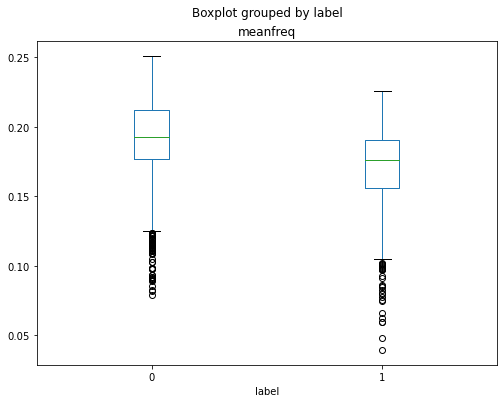

In [172]:
# Convert to label and boxplot of the label and the meanfreq
labelEncoder = LabelEncoder()
data['label'] = labelEncoder.fit_transform(data['label'].astype(str))
data.boxplot(by ='label', column =['meanfreq'], grid = False, figsize=(8,6))

In [173]:
X = data.drop('label', axis=1)
Y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

#### Logistic Regression

In [180]:
logistic_model = LogisticRegression(penalty='l2', solver='liblinear')
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

In [181]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[257  44]
 [ 10 323]]


In [183]:
print("Training score : ", logistic_model.score(x_train, y_train))
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy : ' , acc)
print('Precision Score : ', pre)
print('Recall Score : ', recall)

Training score :  0.909629044988161
Accuracy :  0.9148264984227129
Precision Score :  0.8801089918256131
Recall Score :  0.96996996996997


### German Credit Score Dataset

In [184]:
data = pd.read_csv('german_credit_data_dataset.csv')

In [185]:
data.head(2)

,checking_account_status,duration,credit_history,purpose,credit_amount,savings,present_employment,installment_rate,personal,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,customer_type
0,A11,6,A34,A43,1169.0,A65,A75,4.0,A93,A101,...,A121,67.0,A143,A152,2.0,A173,1,A192,A201,1
1,A12,48,A32,A43,5951.0,A61,A73,2.0,A92,A101,...,A121,22.0,A143,A152,1.0,A173,1,A191,A201,2


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   checking_account_status  1000 non-null   object 
 1   duration                 1000 non-null   int64  
 2   credit_history           1000 non-null   object 
 3   purpose                  1000 non-null   object 
 4   credit_amount            1000 non-null   float64
 5   savings                  1000 non-null   object 
 6   present_employment       1000 non-null   object 
 7   installment_rate         1000 non-null   float64
 8   personal                 1000 non-null   object 
 9   other_debtors            1000 non-null   object 
 10  present_residence        1000 non-null   float64
 11  property                 1000 non-null   object 
 12  age                      1000 non-null   float64
 13  other_installment_plans  1000 non-null   object 
 14  housing                  

In [188]:
# Drop irrelevant features
data = data.drop(['telephone', 'personal', 'present_residence', 'other_installment_plans'], axis=1)

In [189]:
data['savings'].unique()

array(['A65', 'A61', 'A63', 'A64', 'A62'], dtype=object)

In [191]:
# Replace values with labels
savings_dict = {"A65" : 0, "A61" : 1, "A62" : 2, "A63" : 3, "A64" : 4}
data['savings'].replace(savings_dict, inplace=True)

In [192]:
data = pd.get_dummies(data, columns=['checking_account_status', 
                                     'credit_history', 
                                     'purpose',
                                     'present_employment',
                                     'property', 
                                     'housing', 
                                     'other_debtors',
                                     'job', 
                                     'foreign_worker'])

In [193]:
data.head(2)

,duration,credit_amount,savings,installment_rate,age,existing_credits,dependents,customer_type,checking_account_status_A11,checking_account_status_A12,...,housing_A153,other_debtors_A101,other_debtors_A102,other_debtors_A103,job_A171,job_A172,job_A173,job_A174,foreign_worker_A201,foreign_worker_A202
0,6,1169.0,0,4.0,67.0,2.0,1,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,48,5951.0,1,2.0,22.0,1.0,1,2,0,1,...,0,1,0,0,0,0,1,0,1,0


In [195]:
def naive_bayes(x_train, y_train):

    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    
    return classifier

In [196]:
def k_nearest_neighbors(x_train, y_train):

    classifier = KNeighborsClassifier(n_neighbors=10)
    classifier.fit(x_train, y_train)
    
    return classifier

In [197]:
def svc(x_train, y_train):

    classifier = SVC(kernel='rbf', gamma='scale')
    classifier.fit(x_train, y_train)
    
    return classifier

In [198]:
def decision_tree(x_train, y_train):

    classifier = DecisionTreeClassifier(max_depth=6)
    classifier.fit(x_train, y_train)
    
    return classifier

In [199]:
X = data.drop('customer_type', axis=1)
Y = data['customer_type']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [203]:
Y.value_counts()

1    700
2    300
Name: customer_type, dtype: int64

In [205]:
def build_and_train_classifier(x_train, y_train, classfication_fn):

    model = classfication_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    train_score = model.score(x_train, y_train)
    test_score = accuracy = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    print("Training Score : ", train_score)
    print("Testing Score : ", test_score)
    print('Precision Score : ', pre)
    print('Recall Score : ', recall)
    print("\n")

In [206]:
build_and_train_classifier(x_train, y_train, naive_bayes)
build_and_train_classifier(x_train, y_train, k_nearest_neighbors)
build_and_train_classifier(x_train, y_train, svc)
build_and_train_classifier(x_train, y_train, decision_tree)

Training Score :  0.7575
Testing Score :  0.73
Precision Score :  0.8059701492537313
Recall Score :  0.7941176470588235


Training Score :  0.73625
Testing Score :  0.675
Precision Score :  0.6898395721925134
Recall Score :  0.9485294117647058


Training Score :  0.71375
Testing Score :  0.69
Precision Score :  0.6868686868686869
Recall Score :  1.0


Training Score :  0.82625
Testing Score :  0.69
Precision Score :  0.7078651685393258
Recall Score :  0.9264705882352942




### Warm Start

In [208]:
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(x_train, y_train, test_size=0.5)
rfc = RandomForestClassifier(max_depth=4, n_estimators=2, warm_start=True)
rfc.fit(x_train_1, y_train_1)
y_pred = rfc.predict(x_test)
test_score = accuracy = accuracy_score(y_test, y_pred)
print("Testing Score : ", test_score)

Testing Score :  0.7


In [209]:
# Increase estimators by two and then run the other half of the data with the model
rfc.n_estimators += 2
rfc.fit(x_train_2, y_train_2)
y_pred = rfc.predict(x_test)
test_score = accuracy = accuracy_score(y_test, y_pred)
print("Testing Score : ", test_score)

Testing Score :  0.72


## Multi Class Classification

In [211]:
data = pd.read_csv('bbc-text.csv')

In [225]:
data.shape

(2225, 2)

In [226]:
data.head(2)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...


In [212]:
data.category.unique()

array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [213]:
data['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [220]:
count_vectorizer = CountVectorizer()
x_train_count = count_vectorizer.fit_transform(data['text'])
#count_vectorizer.vocabulary_

In [237]:
print(x_train_count[10])

  (0, 13801)	9
  (0, 26462)	27
  (0, 18726)	13
  (0, 28955)	4
  (0, 26464)	1
  (0, 2429)	6
  (0, 3620)	1
  (0, 29260)	1
  (0, 14510)	5
  (0, 26730)	4
  (0, 2395)	1
  (0, 28749)	2
  (0, 2994)	4
  (0, 18837)	2
  (0, 19039)	1
  (0, 1551)	1
  (0, 12684)	2
  (0, 23729)	1
  (0, 26806)	1
  (0, 26501)	2
  (0, 11102)	6
  (0, 2251)	1
  (0, 18849)	1
  (0, 4980)	1
  (0, 26471)	3
  :	:
  (0, 4052)	1
  (0, 26964)	1
  (0, 18882)	1
  (0, 5266)	3
  (0, 24029)	1
  (0, 5172)	1
  (0, 26911)	1
  (0, 29199)	1
  (0, 15528)	1
  (0, 20590)	1
  (0, 9379)	1
  (0, 15153)	1
  (0, 26916)	1
  (0, 25357)	1
  (0, 19778)	1
  (0, 25472)	1
  (0, 17960)	1
  (0, 27183)	1
  (0, 7717)	1
  (0, 19776)	1
  (0, 10559)	1
  (0, 18444)	1
  (0, 12024)	1
  (0, 3638)	1
  (0, 3210)	1


In [222]:
tfidf_vectorizer = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer.fit_transform(data['text'])
#tfidf_vectorizer.vocabulary_

In [224]:
idf_scores = list(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer.idf_))
idf_scores[2000:2010]

[('agm', 7.3216671707156),
 ('agnelli', 7.09852361940139),
 ('agnes', 8.014814351275545),
 ('agnetha', 8.014814351275545),
 ('agnostic', 7.60934924316738),
 ('ago', 3.404656623776414),
 ('agoa', 8.014814351275545),
 ('agonising', 8.014814351275545),
 ('agonisingly', 7.3216671707156),
 ('agony', 8.014814351275545)]

In [228]:
Y = data['category']
x_train, x_test, y_train, y_test = train_test_split(x_train_tfidf, Y, test_size=0.2)

In [229]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [233]:
y_pred = clf.predict(x_test)
y_pred[0:10]

array(['sport', 'business', 'business', 'business', 'sport', 'business',
       'business', 'tech', 'tech', 'politics'], dtype=object)

In [231]:
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.7617977528089888


In [232]:
df_y = pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred})
df_y.sample(10)

,y_test,y_pred
876,politics,business
1961,business,business
713,entertainment,entertainment
1000,politics,politics
1694,politics,politics
336,entertainment,sport
1781,tech,politics
1321,business,business
1917,politics,politics
1459,entertainment,entertainment


# Clustering

In [239]:
data = pd.read_csv('Mall_Customers.csv', index_col=0)

In [240]:
data.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [242]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [243]:
data.drop('Gender', axis=1, inplace=True)
data.drop('Age', axis=1, inplace=True)

In [244]:
data = data.sample(frac=1)

## K Means Clustering - Unlabelled data

In [263]:
k_means = KMeans(n_clusters=2)
k_means.fit(data)
k_means.labels_

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0])

In [264]:
centers = k_means.cluster_centers_
centers

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

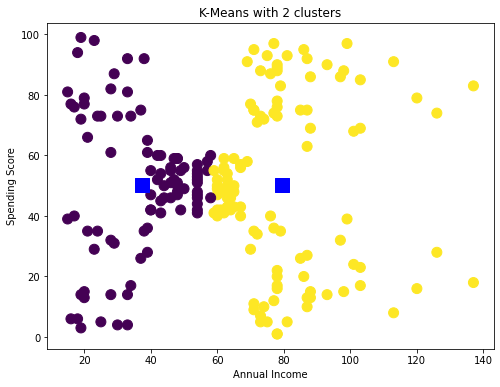

In [265]:
plt.figure(figsize=(8,6))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means with 2 clusters')

plt.show()

In [266]:
core = silhouette_score (data, k_means.labels_)
print("Score = ", score)

Score =  0.553931997444648


In [267]:
k_means = KMeans(n_clusters=5)
k_means.fit(data)

KMeans(n_clusters=5)

In [268]:
centers = k_means.cluster_centers_
centers

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

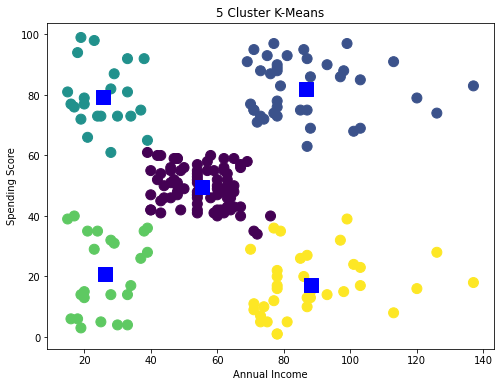

In [269]:
plt.figure(figsize=(8,6))

plt.scatter(data['Annual Income (k$)'], 
            data['Spending Score (1-100)'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('5 Cluster K-Means')

plt.show()

In [270]:
score = silhouette_score(data, k_means.labels_)
print("Score = ", score)

Score =  0.553931997444648


## K Means with labelled data

In [288]:
data = pd.read_csv('cars2.csv')
data.head(2)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.


In [289]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [290]:
data.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [291]:
data = data.sample(frac=1)

In [292]:
data.shape

(261, 8)

In [293]:
# Strip whitespace from columns
data.columns = data.columns.str.lstrip()

In [294]:
# Convert features which are object to numeric
data['cubicinches'] = pd.to_numeric(data['cubicinches'], errors='coerce')
data['weightlbs'] = pd.to_numeric(data['weightlbs'], errors='coerce')

In [303]:
# Drop nan values
data.dropna(inplace=True)

In [304]:
labelEncoder = LabelEncoder()
data['brand'] = labelEncoder.fit_transform(data['brand'].astype(str))

In [305]:
data_x =  pd.DataFrame(data, columns=['mpg', 'cubicinches', 'cylinders', 'hp'])
label_y = data['brand']

Text(0, 0.5, 'Weight')

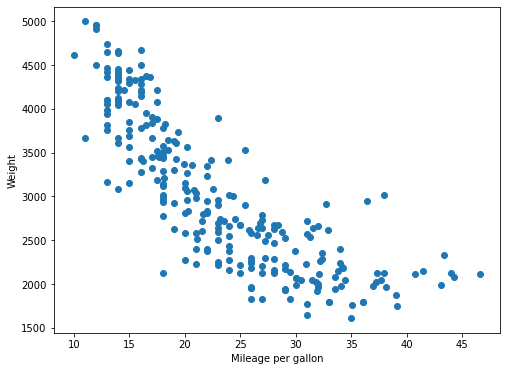

In [306]:
plt.figure(figsize=(8,6))

plt.scatter(data['mpg'], data['weightlbs'])

plt.xlabel("Mileage per gallon")
plt.ylabel("Weight")

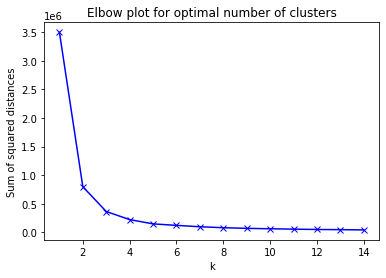

In [307]:
sum_of_squared_distances = []

K = range(1,15)

for k in K:
    k_means = KMeans(n_clusters=k)
    k_means = k_means.fit(data_x)

    sum_of_squared_distances.append(k_means.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')

plt.title('Elbow plot for optimal number of clusters')
plt.show()

In [308]:
k_means = KMeans(n_clusters=3)
k_means = k_means.fit(data_x)
score = silhouette_score (data_x, k_means.labels_)
print("Score = ", score)

Score =  0.6323149311159748


In [310]:
hmg_score = homogeneity_score(label_y, k_means.labels_)
print("Homogeneity Score = ", hmg_score)

Homogeneity Score =  0.31550036277564175


In [311]:
hmg_score = homogeneity_score(label_y, k_means.labels_)
print("Homogeneity Score = ", hmg_score)

Homogeneity Score =  0.31550036277564175


In [312]:
vm_score = v_measure_score(label_y, k_means.labels_)
print("V Measure Score = ", vm_score)

V Measure Score =  0.3003375614022765


In [313]:
comp_score = completeness_score(label_y, k_means.labels_)
print("Completeness Score = ", comp_score)

Completeness Score =  0.28656536273532296


In [314]:
adj_r_score = adjusted_rand_score(label_y, k_means.labels_)
print("Adjusted_rand Score = ", adj_r_score)

Adjusted_rand Score =  0.11281925794858022


In [315]:
adj_mutual = adjusted_mutual_info_score(label_y, k_means.labels_, average_method='arithmetic')
print("Adjusted mutual Score = ", adj_mutual)

Adjusted mutual Score =  0.2945981842532957


## Agglomerative Clustering (Bottom up hierarchical)

In [324]:
coins = coins()

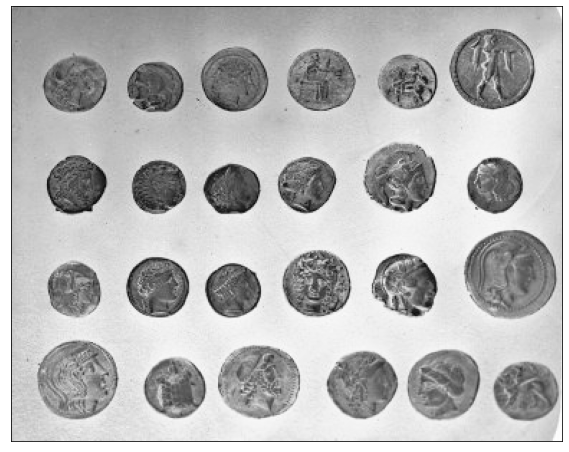

In [325]:
plt.figure(figsize=(10, 8))
plt.imshow(coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

In [326]:
# Blur the image using gaussian filter
smoothened_coins = gaussian_filter(coins, sigma=2)

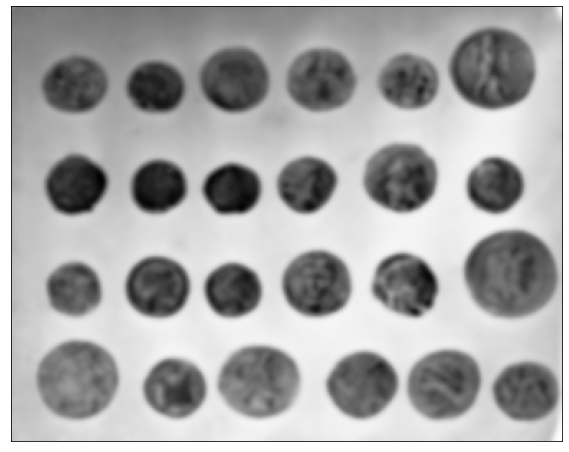

In [327]:
plt.figure(figsize=(10, 8))
plt.imshow(smoothened_coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

In [328]:
rescaled_coins = rescale(smoothened_coins, 0.2, mode="reflect", 
                         anti_aliasing=True, multichannel=False)

In [329]:
rescaled_coins.shape

(61, 77)

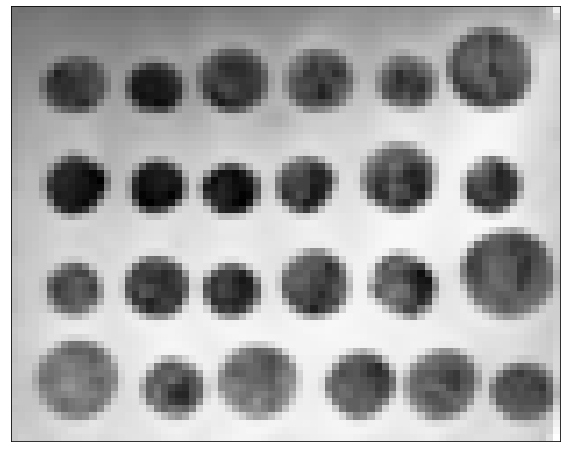

In [330]:
plt.figure(figsize=(10, 8))
plt.imshow(rescaled_coins, cmap='Greys')

plt.xticks(())
plt.yticks(())

plt.show()

In [331]:
n_clusters = 10

In [332]:
X = np.reshape(rescaled_coins, (-1, 1))
X.shape

(4697, 1)

In [334]:
# Minimize average of distances between two clusters to decide which clusters to merge next
ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
ac.fit(X)

AgglomerativeClustering(linkage='average', n_clusters=10)

In [335]:
# Gives the assigned cluster for each pixel of the image
labels = np.reshape(ac.labels_, rescaled_coins.shape)
labels.shape

(61, 77)

In [336]:
ac.labels_

array([2, 2, 2, ..., 1, 0, 9], dtype=int64)

In [337]:
unique_labels =  np.unique(labels)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

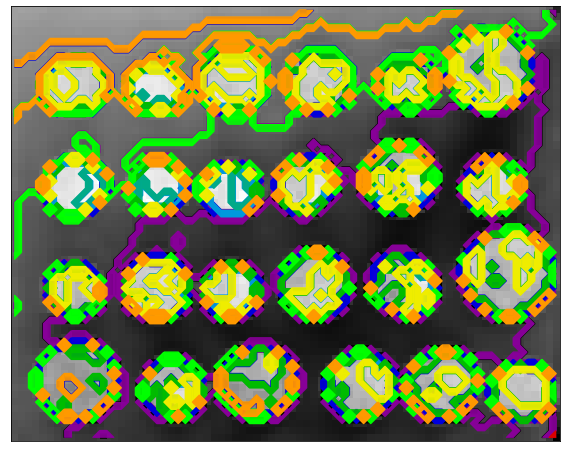

In [338]:
plt.figure(figsize=(10, 8))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in unique_labels:
    plt.contour(labels == l, colors=[plt.cm.nipy_spectral(l / float(n_clusters))])
    
plt.xticks(())
plt.yticks(())

plt.show()

In [340]:
connectivity = grid_to_graph(*rescaled_coins.shape)
connectivity.shape

(4697, 4697)

In [341]:
n_clusters = 27

In [342]:
# Ward minimizes the variance in the clusters being merged
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
ward.fit(X)
labels = np.reshape(ward.labels_, rescaled_coins.shape)
unique_labels =  np.unique(labels)
print("Number of clusters: ", unique_labels)

Number of clusters:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


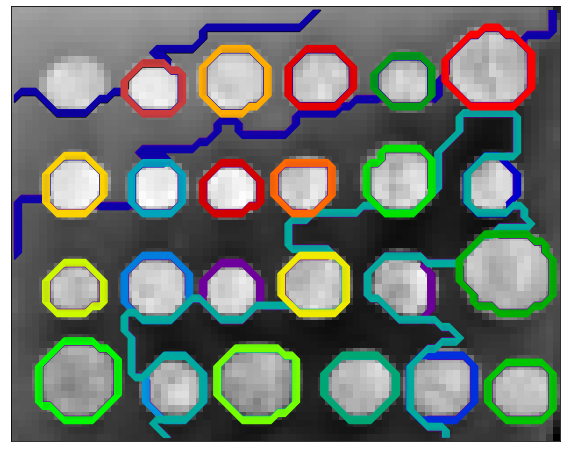

In [343]:
plt.figure(figsize=(10, 8))
plt.imshow(rescaled_coins, cmap=plt.cm.gray)

for l in unique_labels:
    plt.contour(labels == l, colors=[plt.cm.nipy_spectral(l / float(n_clusters))])

plt.xticks(())
plt.yticks(())

plt.show()